## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [12]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [4]:
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [53]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=17, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [67]:
features= ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']
dt_regression = DecisionTreeRegressor(max_depth = 10) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=10)

In [68]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 91.30248337402243
RMSE on test set 409.7085382433759


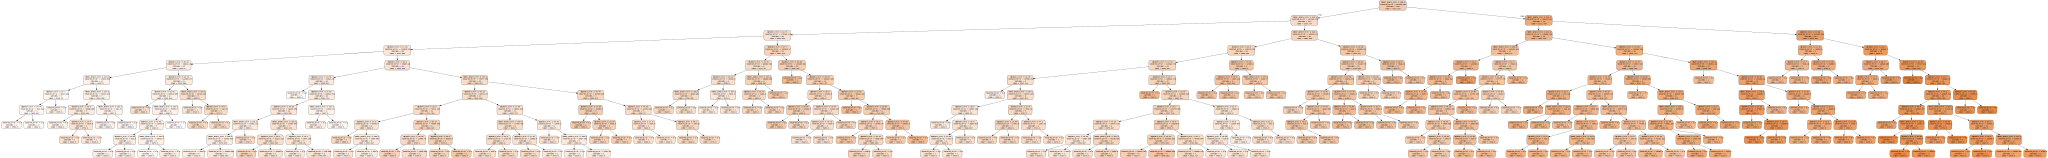

In [69]:
plot_tree_regression(dt_regression, features)

Tussen de training en test set zijn de verschillen best groot. Daarnaast is de RMSE voor de test zet ook best groot (+- 400) maar de RMSE van de training set is redelijk (+- 100).

In [71]:
penguins['body_mass_g'].median()

4050.0

De median van de body mass is 4050 dus een RMSE van 400 is naar mijn mening te groot. Een RMSE van 100 daarentegen is prima.